In [1]:
# Import methods

%run Methods.ipynb

,Samples
0,LMOSTD_1
1,LMOSTD_2
2,Pt10LMO_1
3,Pt10LMO_2
4,PtITOLMO_1
5,PtITOLMO_2
6,Pt_1
7,Pt_2
8,Pt_3
9,TiN_1


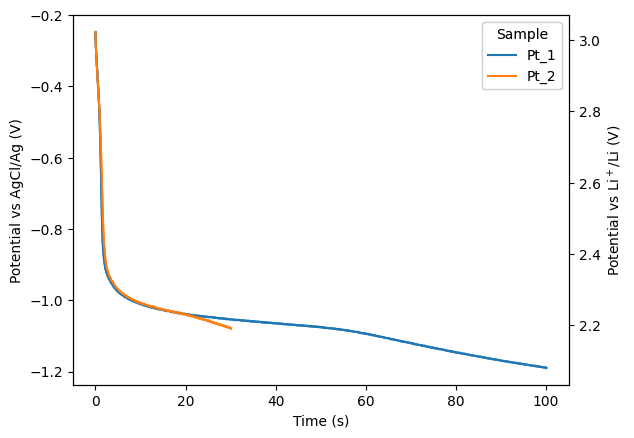

In [2]:
### Deposition NanoSCE FEB

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24Feb_NanoSCE\19FEB'
df, samples = sce_dep(path)
sample_list = [6,7]
# dep_plot(df, sample_list, False, 100)
dep_plot(df, sample_list, True, 100)
samples

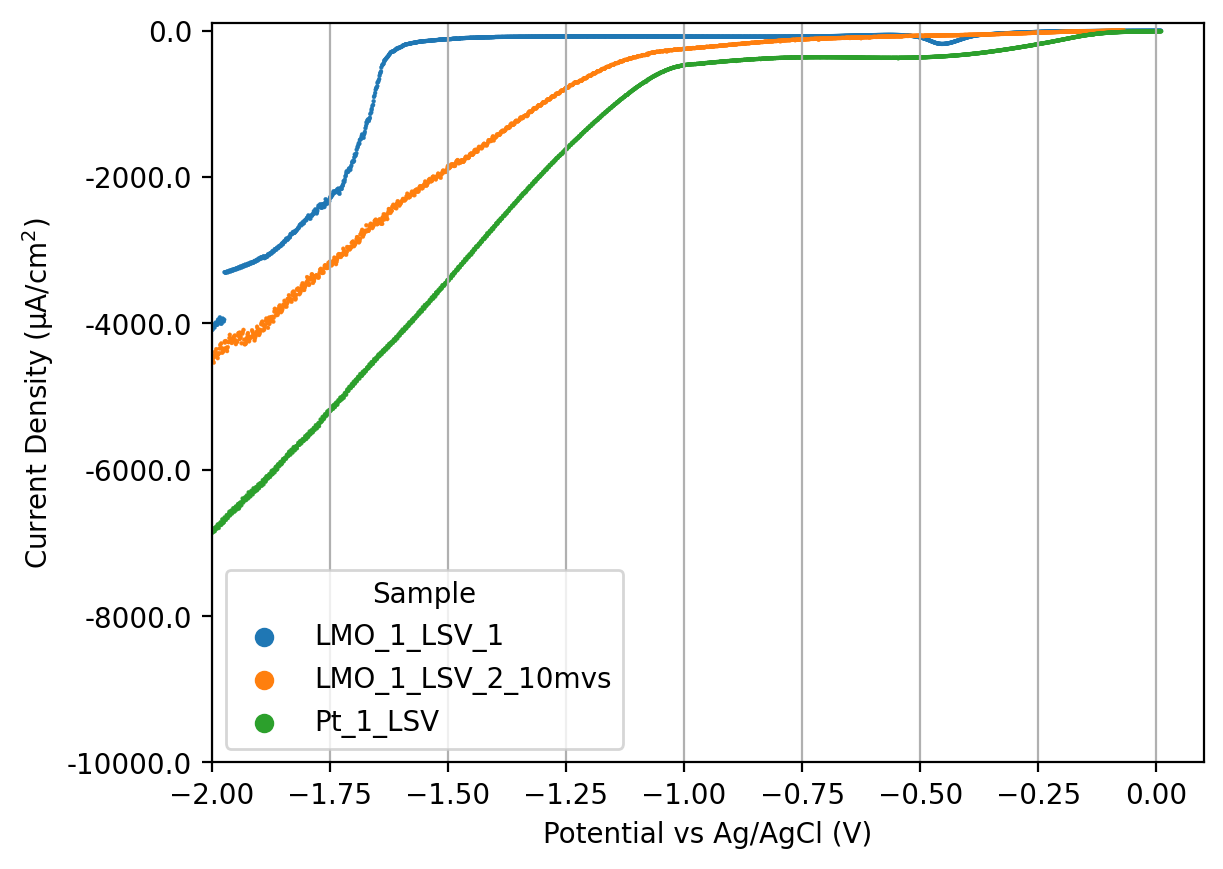

In [3]:
## LMO on water

def cv_water(path, area, dpi):
    cv_files = [os.path.join(path, i) for i in os.listdir(path) if 'CV' in i]
    cv = pd.DataFrame()
    for i in cv_files:
        df = pd.read_csv(i, sep = ';', names = col_dep, skiprows=1)
        df[strings[0]] = df[col_dep[1]] / area
        df['Sample'] = os.path.basename(i)[:-4]
        df[col_cv[0]] = df[col_dep[0]] +3.05 +0.22#  3.05 + 0.14 ## Careful with this
        cv = pd.concat([cv, df], ignore_index = True)
        
        fig, ax = plt.subplots(dpi = dpi)
        sns.scatterplot(data = df, x = col_dep[0], y = strings[0], edgecolor = None, s = 2, hue = 'Scan')
        ax.yaxis.set_major_formatter(formatter_1e6)
        ax.yaxis.grid()
        ax.set_ylabel(strings[1])
        ax2 = ax.twiny()
        sns.scatterplot(data = df, x = col_cv[0], y = strings[0], edgecolor = None, s = 2, hue = 'Scan', ax = ax2)
        ax2.grid()

def lsv_water(path, area, dpi):
    lsv_files = [os.path.join(path, i) for i in os.listdir(path) if 'LSV' in i]
    lsv = pd.DataFrame()
    for i in lsv_files:
        df = pd.read_csv(i, sep = ';', names = col_dep, skiprows=1)
        df = df.drop('Scan', axis = 1)
        df[strings[0]] = df[col_dep[1]] / area
        df['Sample'] = os.path.basename(i)[:-4]
        df[col_cv[0]] = df[col_dep[0]] +3.05 +0.22#  3.05 + 0.14 ## Careful with this
        lsv = pd.concat([lsv, df], ignore_index = True)
    
    fig, ax = plt.subplots(dpi = dpi)
    sns.scatterplot(data = lsv, x = col_dep[0], y = strings[0], edgecolor = None, s = 2, hue = 'Sample')
    ax.yaxis.set_major_formatter(formatter_1e6)
    ax.yaxis.grid()
    ax.set_ylabel(strings[1])
    # ax2 = ax.twiny()
    # sns.scatterplot(data = df, x = col_cv[0], y = strings[0], edgecolor = None, s = 2, ax = ax2)
    # ax2.grid()
    ax.set_ylim(-0.01, 0.0001)
    ax.set_xlim(-2, 0.1)
    ax.grid()
    

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24Feb_NanoSCE\27FEB\CV'
a = np.pi * (0.75 **2)
# cv_water(path, a, 100)
lsv_water(path, a, 200) #, area, 200)



In [4]:


# cv_files = [os.path.join(path, i) for i in os.listdir(path) if 'CV' in i]
# lsv_files = [os.path.join(path, i) for i in os.listdir(path) if 'LSV' in i]

# cv = pd.DataFrame()
# for i in cv_files:
#     df = pd.read_csv(i, sep = ';', names = col_dep, skiprows=1)
#     df[strings[0]] = df[col_dep[1]] / area
#     df['Sample'] = os.path.basename(i)[:-4]
#     df[col_cv[0]] = df[col_dep[0]] + 3.05 + 0.14 ## Careful with this
#     cv = pd.concat([cv, df], ignore_index = True)
    
#     fig, ax = plt.subplots(dpi = 100)
#     sns.scatterplot(data = df, x = col_dep[0], y = strings[0], edgecolor = None, s = 2, hue = 'Scan')
#     ax.yaxis.set_major_formatter(formatter_1e6)
#     ax.yaxis.grid()
#     ax.set_ylabel(strings[1])
#     ax2 = ax.twiny()
#     sns.scatterplot(data = df, x = col_cv[0], y = strings[0], edgecolor = None, s = 2, hue = 'Scan', ax = ax2)
#     ax2.grid()
    
    
    
    
    
    
# cv
    # df[col[]]
    # df = df.rename(columns = {'WE(1).Potential (V)' : col_cv[0],
#                               'WE(1).Current (A)' : col_cv[1]})
#     # df['Current Density ']
#     # fig, ax = plt.subplots()
#     # plt.plot(df[col_cv[0]], df[col_cv[1]])
#     data.append(df)
# cv = cv[cv['Sample'] == 'LMO_2_CV_1']
# fig, ax = plt.subplots(dpi = 100)
# sns.scatterplot(data = cv, x = col_dep[0], y = strings[0], edgecolor = None, s = 2, hue = 'Scan')
# ax.yaxis.set_major_formatter(formatter_1e6)
# ax.yaxis.grid()
# ax.set_ylabel(strings[1])
# ax2 = ax.twiny()
# sns.scatterplot(data = cv, x = col_cv[0], y = strings[0], edgecolor = None, s = 2, hue = 'Sample', ax = ax2)
# ax2.grid()

In [4]:
#### #Pt10nm LMO CV and GC

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\Pt10nm_LMO90nm\Pt10_01'
setup_files(path)
area = np.pi * 0.5 **2
thickness = 90
sample = 'Pt10nm LMO 1C'
pt10nm = cc(path, area, thickness, sample)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Electrochemical\\2024\\Pt10nm_LMO90nm\\Pt10_01'

In [6]:
# #### PLOT Pt10nm LMO

# color_map = 'flare'
# cv_plot(pt10nm, color_map, 100)
# plt.grid()
# cc_plot(pt10nm, color_map, 100)
# plt.grid()
# dq_dv_plot(pt10nm, color_map, 100)
# plt.ylim(0, 600)